Dependencies

In [1]:
!pip install pdf2image
!git clone https://github.com/PaddlePaddle/PaddleOCR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'PaddleOCR'...
remote: Enumerating objects: 45598, done.
remote: Counting objects: 100% (393/393), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 45598 (delta 167), reused 296 (delta 95), pack-reused 45205
Receiving objects: 100% (45598/45598), 338.91 MiB | 32.05 MiB/s, done.
Resolving deltas: 100% (32090/32090), done.
Updating files: 100% (1620/1620), done.


In [2]:
!sudo apt-get install poppler-utils
!pip install paddleocr
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple
!pip install paddlepaddle
!pip install protobuf==3.19.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 0s (374 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: 

image preprocessing

In [1]:
from paddleocr import PaddleOCR,draw_ocr
from matplotlib import pyplot as plt
import cv2
import os
from google.colab.patches import cv2_imshow
from pdf2image import convert_from_path
from PIL import Image 
import PIL 
import os

/usr/lib/python3/dist-packages/urllib3/util/selectors.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import namedtuple, Mapping
/usr/lib/python3/dist-packages/urllib3/_collections.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, MutableMapping


ModuleNotFoundError: No module named 'tools.infer'

In [6]:
# Directory
directory = "converted_pdf"
  
# Parent Directory path
parent_dir = "/content"
path = os.path.join(parent_dir, directory)
os.mkdir(path)
new_dir = "/content/converted_pdf"

dir = '/content/invoice'
for index,filename in enumerate(os.listdir(dir)):
    file_dir = str(dir)+"/"+filename
    # Store Pdf with convert_from_path function\
    images = convert_from_path(file_dir) #dpi = 100
    for i in range(len(images)):
        # Save pages as images in the pdf
        images[i].save(str(new_dir)+'/'+str(filename)+"_image"+str(i)+'.png', 'PNG')

In [7]:
# Renaming the file created
temp_dir = '/content/converted_pdf'
for i in os.listdir(temp_dir):
    a = i.replace('.pdf','')
    new_filename = str(temp_dir)+'/'+a
    old_filename = str(temp_dir)+'/'+i
    os.rename(old_filename,new_filename)

check the image orientation

In [8]:
temp_dir = '/content/converted_pdf'

In [9]:
import numpy as np
from PIL import Image, ImageEnhance

In [10]:
for i in os.listdir(temp_dir):
  t_dir = temp_dir+"/"+i
  image = cv2.imread(t_dir)
  # Convert the image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Use the Canny edge detection algorithm to detect edges in the image
  edges = cv2.Canny(gray, 50, 150)
  # Calculate the histograms of the edges in the x and y direction
  histogram_x = cv2.reduce(edges, 0, cv2.REDUCE_AVG).reshape(-1)
  histogram_y = cv2.reduce(edges, 1, cv2.REDUCE_AVG).reshape(-1)
  # Calculate the standard deviation of the histograms
  std_x = np.std(histogram_x)
  std_y = np.std(histogram_y)
  # If the standard deviation in the x direction is greater than the standard deviation in the y direction,
  # the image is likely to be rotated
  if std_x > std_y:
      print("The image is rotated")
      im = Image.open(t_dir)
      ima = im.rotate(270, expand=True)
      #im.show()
      ima.save(t_dir)
  else:
      print("The image is straight") 

The image is rotated
The image is straight
The image is straight
The image is straight
The image is straight
The image is straight
The image is straight
The image is straight
The image is straight
The image is straight


ocr multiple images

In [11]:
# Load the ocr model
ocr = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:19<00:00, 202kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:17<00:00, 561kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 150kiB/s]

[2023/02/09 09:04:47] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

In [12]:
# Directory
directory = "OCR_out"
  
# Parent Directory path
parent_dir = "/content"
path = os.path.join(parent_dir, directory)
os.mkdir(path)
new_dir = "/content/OCR_out"

In [ ]:
dir = '/content/converted_pdf'
#f = open(new_file_dir+'/'+"ocr_out.txt", "a")
for file_name in os.listdir(dir):
  #count = 0
  img_path = dir+'/'+file_name
  results = ocr.ocr(img_path)
  # print(results)
  #f = open(new_file_dir+'/'+"ocr_out.txt", "a")
  img = cv2.imread(img_path)
  scores = []
  boxes = []
  texts = []
  for i in range(len(results[0])):
    scores.append(results[0][i][1][1])
    boxes.append(results[0][i][0])
    texts.append(results[0][i][1][0])
  font_path = '/content/PaddleOCR/doc/fonts/latin.ttf'
  annotated = draw_ocr(img, boxes, texts, scores, font_path = font_path)
  cv2_imshow(annotated)
  #count+=1
  cv2.imwrite(new_dir+'/'+str(file_name)+'.png',annotated)

In [15]:
# Renaming the file created
temp_dir = '/content/OCR_out'
for i in os.listdir(temp_dir):
    a = i.replace('.png.png','.png')
    new_filename = str(temp_dir)+'/'+a
    old_filename = str(temp_dir)+'/'+i
    os.rename(old_filename,new_filename)

#single pdf

In [ ]:
pdf_path = '/content/Payment Challan-Sample.pdf'

In [ ]:
images = convert_from_path(pdf_path)

In [ ]:
for i in range(len(images)):
      # Save pages as images in the pdf
      images[i].save('images.png', 'PNG')

In [ ]:
img_path = '/content/images.png'

In [ ]:
img = Image.open(img_path)

In [ ]:
Rotated_image = img.rotate(270)

In [ ]:
Rotated_image.show()

ocr

In [ ]:
# Load the ocr model
ocr = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:15<00:00, 264kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:10<00:00, 969kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:13<00:00, 158kiB/s]

[2023/02/09 04:47:29] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

In [ ]:
results = ocr.ocr(img_path)

[2023/02/09 05:25:40] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/02/09 05:25:41] ppocr DEBUG: dt_boxes num : 77, elapse : 1.116560935974121
[2023/02/09 05:25:59] ppocr DEBUG: rec_res num  : 77, elapse : 17.316845655441284


In [ ]:
results

[[[[[646.0, 150.0], [1519.0, 152.0], [1519.0, 185.0], [646.0, 182.0]],
   ('COMBINED CHALLAN OF A/C NO.01,02,10,21 & 22 (With', 0.9915363788604736)],
  [[[688.0, 199.0], [1432.0, 201.0], [1432.0, 233.0], [687.0, 231.0]],
   ("EMPLOYEES' PROVIDENT FUND ORGANISATION", 0.9755130410194397)],
  [[[1652.0, 203.0], [1941.0, 203.0], [1941.0, 233.0], [1652.0, 233.0]],
   ('TRRN 3172005000827', 0.9990081787109375)],
  [[[66.0, 337.0], [406.0, 337.0], [406.0, 360.0], [66.0, 360.0]],
   ('Establishment Code & Name', 0.9984754920005798)],
  [[[438.0, 337.0], [678.0, 337.0], [678.0, 360.0], [438.0, 360.0]],
   ('KDMAL0210062000', 0.9998905658721924)],
  [[[724.0, 337.0], [1272.0, 337.0], [1272.0, 360.0], [724.0, 360.0]],
   ('DIEBOLD NIXDORF INDIA PRIVATE LIMITED', 0.9695255160331726)],
  [[[1547.0, 335.0], [1877.0, 335.0], [1877.0, 365.0], [1547.0, 365.0]],
   ('Dues for the wage month of', 0.9992015361785889)],
  [[[1936.0, 335.0], [1996.0, 335.0], [1996.0, 363.0], [1936.0, 363.0]],
   ('April', 0

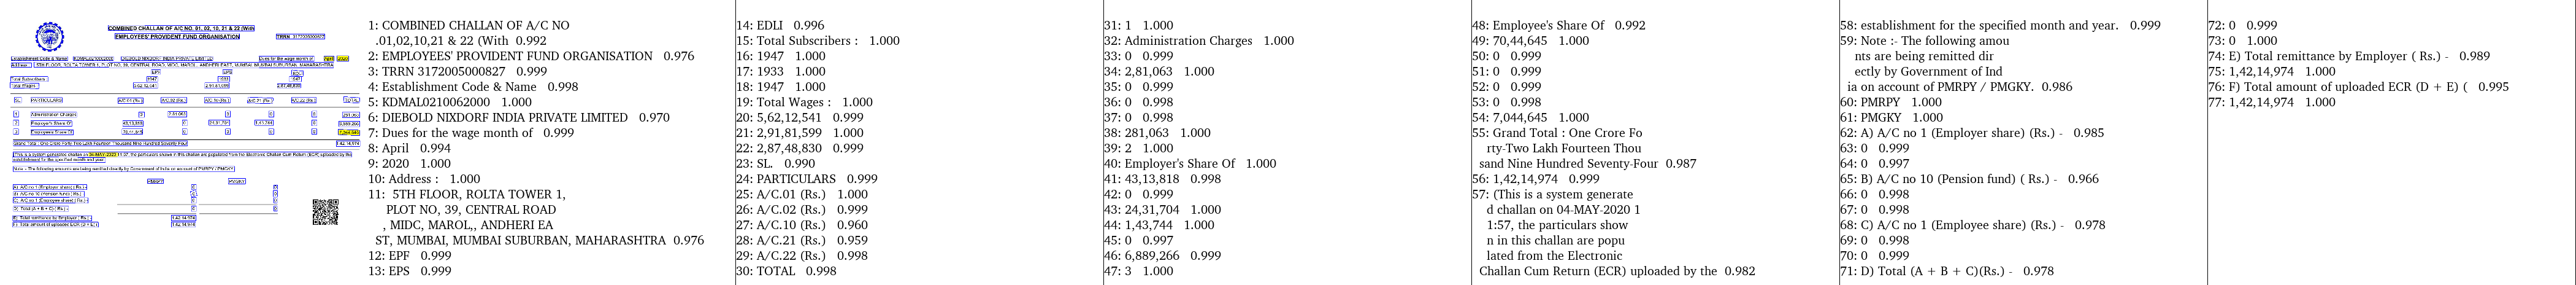

True

In [ ]:
img = cv2.imread(img_path)
scores = []
boxes = []
texts = []
for i in range(len(results[0])):
  scores.append(results[0][i][1][1])
  boxes.append(results[0][i][0])
  texts.append(results[0][i][1][0])
font_path = '/content/PaddleOCR/doc/fonts/latin.ttf'
annotated = draw_ocr(img, boxes, texts, scores, font_path = font_path)
cv2_imshow(annotated)
cv2.imwrite('annotated.png',annotated)

# QR Code detection and decoding

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15089, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15089 (delta 5), reused 5 (delta 2), pack-reused 15074
Receiving objects: 100% (15089/15089), 14.13 MiB | 18.00 MiB/s, done.
Resolving deltas: 100% (10335/10335), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0

In [22]:
!python detect.py --weights /content/drive/MyDrive/qr_pt/best.pt --img 416 --conf 0.4 --source /content/converted_pdf --save-crop 

detect: weights=['/content/drive/MyDrive/qr_pt/best.pt'], source=/content/converted_pdf, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-85-ga270b4f Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/converted_pdf/5121151490_image0.png: 416x320 1 qr_code, 142.7ms
image 2/10 /content/converted_pdf/72003406_image0.png: 416x320 (no detections), 138.2ms
image 3/10 /content/converted_pdf/72003406_image1.png: 416x320 (no detections), 123.0ms
image 4/10 /content/converted_pdf/72003406_image2.png: 416x320 2 qr_codes, 124.6ms
image 5/10 /content/c

In [23]:
!pip install pyzbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
!apt install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 27 not upgraded.
Need to get 238 kB of archives.
After this operation, 817 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4lconvert0 amd64 1.18.0-2build1 [76.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4l-0 amd64 1.18.0-2build1 [41.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libzbar0 amd64 0.23-1.3 [119 kB]
Fetched 238 kB in 0s (2,086 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 129531 files and directories current

In [25]:
from pyzbar.pyzbar import decode

In [ ]:
dir = '/content/yolov5/runs/detect/exp/crops/qr_code'
for index,filename in enumerate(os.listdir(dir)): 
    #f = open(new_file_dir+'/'+"qr_code.txt", "a")
    img = cv2.imread(str(dir)+"/"+filename)
    #cv2_imshow(img)
    #detector = cv2.QRCodeDetector()
    decoded_qr = decode(img)
    #print(decoded_qr[0][0])
    #print(filename)
    #print(decoded_qr)
   # if decoded_qr == []:
    #   print("yes")
    # else:
    #   print("No")
    #print("Data:",decoded_qr[0][0])
    #print("Bounding Box:",decoded_qr[0][2])
    # if decoded_qr == []:
    #   f.write(str(filename))
    #   f.write(' ')
    #   f.write('There is no barcode')
    # else:
    #   f.write(str(filename))
    #   f.write(' ')
    #   f.write('Barcode detected')
    #   f.write(' ')
    #   f.write("{Data}:"+str(decoded_qr[0][0]))
    # f.write('\n')
    # f.close()
    #f.write("{Data}:"+str(decoded_qr[0][0]))
    #f.write("{bbox}:"+str(decoded_qr[0][2]))
    # f.write("{straight_qrcode}:"+str(straight_qrcode))
    if decoded_qr == []:
      pass
    else:
      d = decoded_qr[0][2]
      image = cv2.rectangle(img, (d.left, d.top),
                        (d.left + d.width, d.top + d.height), (255, 0, 0), 2)
      #cv2.imwrite(new_dir+'/'+filename+'.png',image)
      cv2_imshow(image)
      print("Decoded link",decoded_qr[0][0])
      print("Bounding box",decoded_qr[0][3])